<h2>
    Gap-filling on GPS data sets using iterative EOF and time series analysis
</h2>
    <h4>This for the North_NZ2009.csv data set.<br></h4>
    Libraries used-<br>
    numpy<br>
    pandas<br>
    os <br>
    matplotlib <br>
    eofs.standard <br>
    random <br><br>
    An iterative algorithm, EOF analysis, has been suggested the retrieve the missing values in CGPS data. Using the data, we first construct a spatial-temporal matrix. The missing values are then initialized appropriately. The method then decomposes the constructed matrix into different EOF modes. The optimum number of EOF modes are selected such that we are able to cover maximum variability in the data. The matrix is reconstructed using the number of modes calculated. An iterative update of missing values is performed, which gives the best estimate of missing data points. To verify the correctness of this method, 1-2% of the given data has been used as the cross-validation-set, to see if the missing values can be estimated correctly or not.

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random

In [16]:
df=pd.read_csv('North_NZ2009.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as org_matrix
print(east_matrix)
print(m)
print(n)

[[ -58.01  -57.38  -55.36 ...  409.92  410.25  409.03]
 [   0.      0.      0.   ...  219.17  219.49  218.93]
 [-167.57 -170.74 -172.59 ...  299.47  299.64  298.7 ]
 ...
 [   0.      0.      0.   ...  826.87  826.71  825.18]
 [   0.      0.      0.   ...   70.37   74.85   75.15]
 [   0.      0.      0.   ...   78.88   78.29   78.06]]
99
4291


In [17]:
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [18]:
"""
Example of reconstructing the matrix using 20 components
"""
solver = Eof(east_matrix) 
components=20
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[  45.61646567   45.93015092   46.12941789 ...  118.40997095
   118.16732022  117.94257621]
 [  48.4459494    49.0466063    49.43572341 ...  -72.07875603
   -72.68826464  -72.34801742]
 [ -48.20984121  -48.65697707  -48.50861335 ...    8.48844273
     8.5631819     8.65829232]
 ...
 [  25.93499663   26.10897966   26.00356916 ...  535.14790567
   534.72815913  533.99136507]
 [  25.20799762   23.8869069    24.72688556 ... -225.27339875
  -221.21571836 -219.75139985]
 [   8.05297513    7.57536746    8.44383892 ... -211.64671989
  -210.47241322 -211.51501065]]


In [19]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)

In [20]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(99,)


In [21]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

1.0


In [22]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 10-15 components seems to be enough to cover the variance

[8.2538e+01 1.4551e+01 1.2060e+00 5.2000e-01 3.7300e-01 1.6200e-01
 1.0400e-01 8.3000e-02 6.6000e-02 5.8000e-02 4.4000e-02 3.8000e-02
 3.0000e-02 2.8000e-02 2.2000e-02 1.9000e-02 1.8000e-02 1.4000e-02
 1.3000e-02 1.1000e-02 1.0000e-02 9.0000e-03 9.0000e-03 8.0000e-03
 8.0000e-03 6.0000e-03 5.0000e-03 5.0000e-03 4.0000e-03 4.0000e-03
 3.0000e-03 3.0000e-03 3.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

17.734926865139567


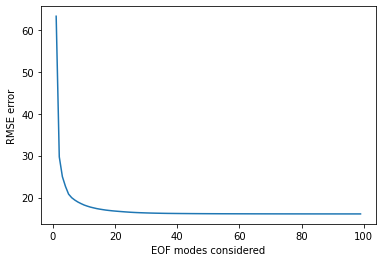

In [23]:
"""
plotting the RMSE error vs the number of EOF modes considered
"""
x_components=[]
y_error=[]
for k in range(99):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[11])            #error for 12 components

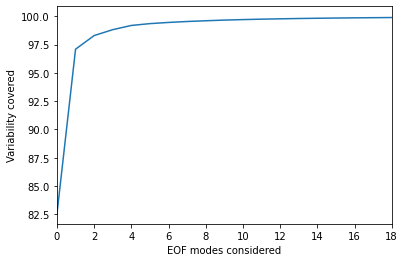

In [24]:
"""
plotting the variance expressed vs the no. of EOF modes considered
"""
variance_covered=0.0
y=[]
x=[]
for i in range(99):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=18
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [25]:
print(east_matrix)

[[  30.44373737   30.89292929   33.15212121 ...  151.94555556
   151.96191919  151.46545455]
 [   0.            0.            0.         ...  -38.80444444
   -38.79808081  -38.63454545]
 [ -79.11626263  -82.46707071  -84.07787879 ...   41.49555556
    41.35191919   41.13545455]
 ...
 [   0.            0.            0.         ...  568.89555556
   568.42191919  567.61545455]
 [   0.            0.            0.         ... -187.60444444
  -183.43808081 -182.41454545]
 [   0.            0.            0.         ... -179.09444444
  -179.99808081 -179.50454545]]


In [26]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=12
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        print(k+1, var1/var2)
        if(var1/var2 < 0.000001):
            break
print(temp_matrix)

1 0.008884021904251246
1 0.0016334807284113543
1 0.0008847553345711673
1 0.0005812568206548389
1 0.0004045681383165774
1 0.00029041633926176705
1 0.00021349136115351736
1 0.0001604006463155543
1 0.00012308295215190872
1 9.640998767561526e-05
1 7.702958145827665e-05
1 6.271262149920927e-05
1 5.195654576368443e-05
1 4.373622474358316e-05
1 3.7344345795679695e-05
1 3.2287654046503254e-05
1 2.8218651258000192e-05
1 2.4890108234617992e-05
1 2.212443516872833e-05
1 1.979284151825785e-05
1 1.780101835341066e-05
1 1.6079213049006317e-05
1 1.457529184471103e-05
1 1.324985410535409e-05
1 1.2072767710810165e-05
1 1.1020696619302912e-05
1 1.0075326091433625e-05
1 9.222081641555459e-06
1 8.44919940886009e-06
1 7.747047951966246e-06
1 7.107630766367013e-06
1 6.524219263139908e-06
1 5.991080305354029e-06
1 5.503272545945749e-06
1 5.056493021044908e-06
1 4.646960599477234e-06
1 4.271326578085415e-06
1 3.92660536553891e-06
1 3.610120111398046e-06
1 3.3194595215212113e-06
1 3.052443104684515e-06
1 2.807

In [27]:
print(org_matrix)

[[  30.44373737   30.89292929   33.15212121 ...  151.94555556
   151.96191919  151.46545455]
 [   0.            0.            0.         ...  -38.80444444
   -38.79808081  -38.63454545]
 [ -79.11626263  -82.46707071  -84.07787879 ...   41.49555556
    41.35191919   41.13545455]
 ...
 [   0.            0.            0.         ...  568.89555556
   568.42191919  567.61545455]
 [   0.            0.            0.         ... -187.60444444
  -183.43808081 -182.41454545]
 [   0.            0.            0.         ... -179.09444444
  -179.99808081 -179.50454545]]


In [28]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix) #reconstructed and refined dataset after applying iterative EOF analysis

[[ -58.01        -57.38        -55.36       ...  409.92
   410.25        409.03      ]
 [-224.39894336 -224.65158658 -224.65424238 ...  219.17
   219.49        218.93      ]
 [-167.57       -170.74       -172.59       ...  299.47
   299.64        298.7       ]
 ...
 [-505.13363661 -509.13846619 -504.09498212 ...  826.87
   826.71        825.18      ]
 [-144.64078538 -146.80885078 -145.0485084  ...   70.37
    74.85         75.15      ]
 [-108.04164454 -107.87381342 -107.22854143 ...   78.88
    78.29         78.06      ]]
